# Multivariate Statistics
P variables with N independent samples
$$
\boldsymbol{X} = \begin{bmatrix}
    x_{11} & \dots & x_{1j} & \dots & x_{1p}\\
    \vdots &&\vdots &&\vdots\\ 
    x_{i1} & \dots & x_{ij} & \dots & x_{ip}\\
    \vdots &&\vdots &&\vdots\\ 
    x_{N1} & \dots & x_{Nj} & \dots & x_{Np}\\
\end{bmatrix}_{n\times p}$$

## Linear Algebra
### Eiclidean norm and distance
### Dot product and projection

In [71]:
import numpy as np
np.random.seed(1)

a = np.random.randn(10)
b = np.random.randn(10)

np.dot(a,b)

7.965765619141503

## Mean vector
## Covariance matrix
$$\Sigma_{XX} = E(\boldsymbol{X}-E(\boldsymbol{X}))^TE(\boldsymbol{X}-E(\boldsymbol{X}))$$
Estimator
$$s_{jk} = s_{kj} = \frac{1}{N-1}\boldsymbol{x_j^Tx_k} = \frac{1}{N-1}\sum_{i=1}^N x_{ij}x_{ik}$$

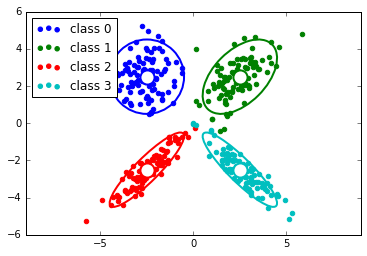

In [72]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plot_utils
import seaborn as sns


np.random.seed(42)
colors = sns.color_palette()

n_samples, n_features = 100, 2

mean, Cov, X = [None] * 4, [None] * 4, [None] * 4
mean[0] = np.array([-2.5, 2.5])
Cov[0] = np.array([[1, 0],
                   [0, 1]])

mean[1] = np.array([2.5, 2.5])
Cov[1] = np.array([[1, .5],
                   [.5, 1]])

mean[2] = np.array([-2.5, -2.5])
Cov[2] = np.array([[1, .9],
                   [.9, 1]])

mean[3] = np.array([2.5, -2.5])
Cov[3] = np.array([[1, -.9],
                   [-.9, 1]])

for i in range(len(mean)):
    X[i] = np.random.multivariate_normal(mean[i], Cov[i], n_samples)

for i in range(len(mean)):
    plt.scatter(X[i][:, 0], X[i][:, 1], color=colors[i], label="class %i" % i)
    plt.scatter(mean[i][0], mean[i][1], marker="o", s=200, facecolors='w', 
                edgecolors=colors[i], linewidth=2)
    plot_utils.plot_cov_ellipse(Cov[i], pos=mean[i], facecolor='none',
                                         linewidth=2, edgecolor=colors[i])

plt.axis('equal')
_ = plt.legend(loc='upper left')

## Precision matrix
Reciprocal of the covariance matrix

In [73]:
Cov = np.array([[1.0, 0.9, 0.9, 0.0, 0.0, 0.0], 
                [0.9, 1.0, 0.9, 0.0, 0.0, 0.0],
                [0.9, 0.9, 1.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 1.0, 0.9, 0.0],
                [0.0, 0.0, 0.0, 0.9, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

print("# Precision matrix:")
Prec = np.linalg.inv(Cov)
print(Prec.round(2))
print("# Partial correlations:")
Pcor = np.zeros(Prec.shape)
Pcor[::] = np.NaN

for i, j in zip(*np.triu_indices_from(Prec, 1)):
    Pcor[i, j] = - Prec[i, j] / np.sqrt(Prec[i, i] * Prec[j, j])
print(Pcor.round(2))

# Precision matrix:
[[ 6.79 -3.21 -3.21  0.    0.    0.  ]
 [-3.21  6.79 -3.21  0.    0.    0.  ]
 [-3.21 -3.21  6.79  0.    0.    0.  ]
 [ 0.    0.    0.    5.26 -4.74  0.  ]
 [ 0.    0.    0.   -4.74  5.26  0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]]
# Partial correlations:
[[  nan  0.47  0.47 -0.   -0.   -0.  ]
 [  nan   nan  0.47 -0.   -0.   -0.  ]
 [  nan   nan   nan -0.   -0.   -0.  ]
 [  nan   nan   nan   nan  0.9  -0.  ]
 [  nan   nan   nan   nan   nan -0.  ]
 [  nan   nan   nan   nan   nan   nan]]


## Mahalanobis distance     
$$D_M(\boldsymbol{x},\mu) = \sqrt{(\boldsymbol{x} - \mu)^T\boldsymbol{\Sigma^{-1}}(\boldsymbol{x} - \mu)}$$

In [74]:
ones = np.ones(Cov.shape[0])
d_euc = np.sqrt(np.dot(ones, ones))
d_mah = np.sqrt(np.dot(np.dot(ones, Prec), ones))
print("Euclidean norm of ones=%.2f. Mahalanobis norm of ones=%.2f" % (d_euc, d_mah))
print(np.dot(ones, Prec))

Euclidean norm of ones=2.45. Mahalanobis norm of ones=1.77
[0.35714286 0.35714286 0.35714286 0.52631579 0.52631579 1.        ]


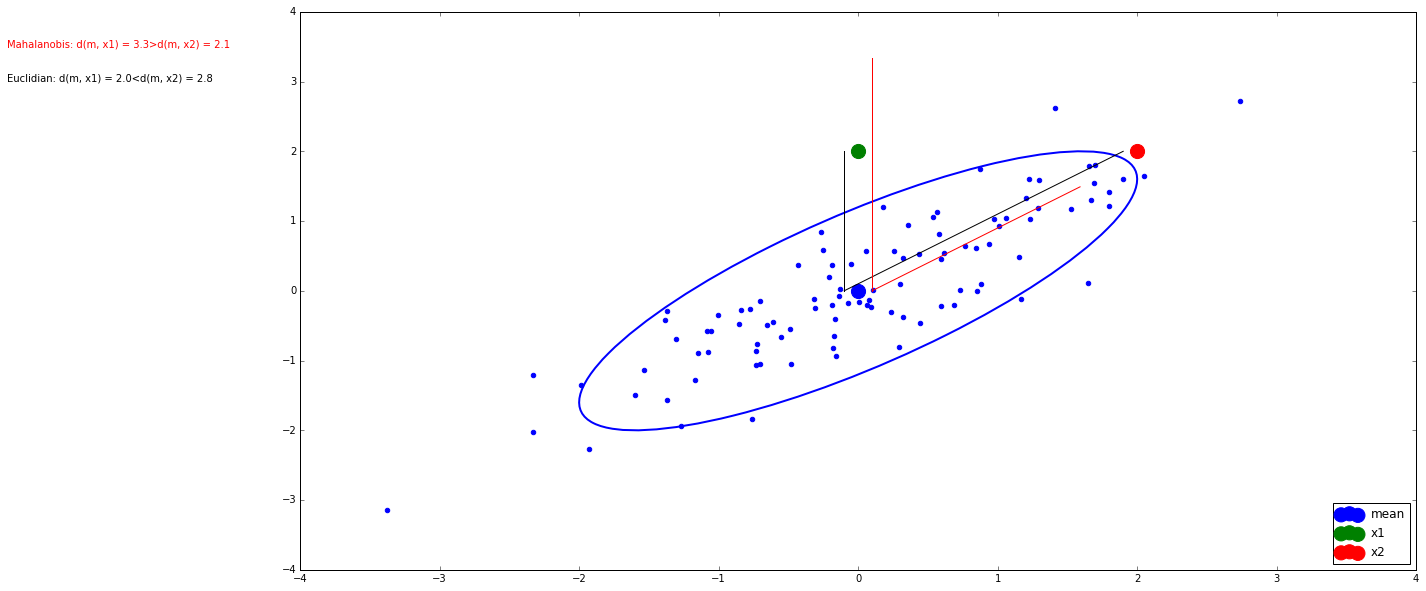

In [83]:
np.random.seed(40)
colors = sns.color_palette()

mean = np.array([0, 0])
Cov = np.array([[1, .8],
                [.8, 1]])
samples = np.random.multivariate_normal(mean, Cov, 100)
x1 = np.array([0, 2])
x2 = np.array([2, 2])

plt.scatter(samples[:, 0], samples[:, 1], color=colors[0])
plt.scatter(mean[0], mean[1], color=colors[0], s=200, label="mean")
plt.scatter(x1[0], x1[1], color=colors[1], s=200, label="x1")
plt.scatter(x2[0], x2[1], color=colors[2], s=200, label="x2")

plot_utils.plot_cov_ellipse(Cov, pos=mean, facecolor='none', linewidth=2, edgecolor=colors[0])

d2_m_x1 = scipy.spatial.distance.euclidean(mean, x1)
d2_m_x2 = scipy.spatial.distance.euclidean(mean, x2)

Covi = scipy.linalg.inv(Cov)
dm_m_x1 = scipy.spatial.distance.mahalanobis(mean, x1, Covi)
dm_m_x2 = scipy.spatial.distance.mahalanobis(mean, x2, Covi)

vm_x1 = (x1 - mean) / d2_m_x1
vm_x2 = (x2 - mean) / d2_m_x2
jitter = .1

plt.plot([mean[0] - jitter, d2_m_x1 * vm_x1[0] - jitter], [mean[1], d2_m_x1 * vm_x1[1]], color='k')
plt.plot([mean[0] - jitter, d2_m_x2 * vm_x2[0] - jitter], [mean[1], d2_m_x2 * vm_x2[1]], color='k')
plt.plot([mean[0] + jitter, dm_m_x1 * vm_x1[0] + jitter], [mean[1], dm_m_x1 * vm_x1[1]], color='r')
plt.plot([mean[0] + jitter, dm_m_x2 * vm_x2[0] + jitter], [mean[1], dm_m_x2 * vm_x2[1]], color='r')

plt.legend(loc='lower right')
plt.text(-6.1, 3, 'Euclidian: d(m, x1) = %.1f<d(m, x2) = %.1f' % (d2_m_x1, d2_m_x2), color='k')
plt.text(-6.1, 3.5, 'Mahalanobis: d(m, x1) = %.1f>d(m, x2) = %.1f' % (dm_m_x1, dm_m_x2), color='r')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## Multivariate normal distribution

$$\mathcal{N}(\boldsymbol{x}|\mu,\Sigma) = \frac{1}{(2\pi)^{P/2}|\boldsymbol{\Sigma}|^{1/2}}\exp\{-\frac{1}{2}(\boldsymbol{x} - \mu)^T\boldsymbol{\Sigma^{-1}}(\boldsymbol{x} - \mu)\}$$

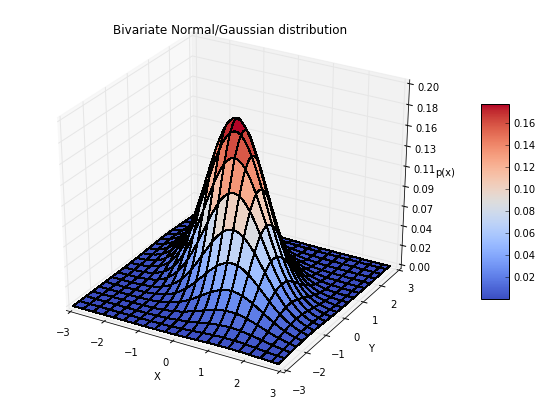

In [76]:
from mpl_toolkits.mplot3d import Axes3D
def multivariate_normal_pdf(X, mean, sigma):
    P = X.shape[1]
    det = np.linalg.det(sigma)
    norm_const = 1.0 / (((2*np.pi) ** (P/2)) * np.sqrt(det))
    X_mu = X - mu
    inv = np.linalg.inv(sigma)
    d2 = np.sum(np.dot(X_mu, inv) * X_mu, axis=1)
    return norm_const * np.exp(-0.5 * d2)

mu = np.array([0, 0])
sigma = np.array([[1, -.5],
                  [-.5, 1]])

x, y = np.mgrid[-3:3:.1, -3:3:.1]
X = np.stack((x.ravel(), y.ravel())).T
norm = multivariate_normal_pdf(X, mean, sigma).reshape(x.shape)

#norm_scpy = multivariate_normal_pdf(mu, sigma).pdf(np.stack((x, y), axis=2))
#assert np.allclose(norm, norm_scpy)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, norm, rstride=3, cstride=3, cmap=plt.cm.coolwarm, linewidth=1, antialiased=False)

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Normal/Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)
plt.show()

## Exercises